# Libraries Used

In [ ]:
import os
import pathlib
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
import random
import re
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers import LSTM, Input, Flatten, Embedding, Dropout
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

[nltk_data] Downloading package wordnet to C:\Users\Ananay
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ananay
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ananay
[nltk_data]     Srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Importing Data

In [ ]:
df = pd.read_csv('dailydialog.csv')

In [ ]:
#test = pd.read_excel(r'test_file.xlsx')
#dev = pd.read_excel(r'dev_file.xlsx')

In [ ]:
df.head()

,Emotion,Text
0,0,"Say , Jim , how about going for a few beers af..."
1,0,You know that is tempting but is really not g...
2,0,What do you mean ? It will help us to relax .
3,0,Do you really think so ? I don't . It will ju...
4,0,I guess you are right.But what shall we do ? ...


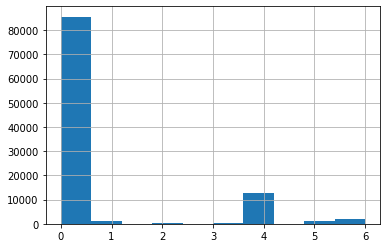

In [ ]:
df.Emotion.hist()
plt.show()

In [ ]:
df.Emotion.value_counts()

0    85572
4    12885
6     1823
5     1150
1     1022
2      353
3      174
Name: Emotion, dtype: int64

In [ ]:
df_0 = df[df.Emotion==0]
df_1 = df[df.Emotion==1]
df_2 = df[df.Emotion==2]
df_3 = df[df.Emotion==3]
df_4 = df[df.Emotion==4]
df_5 = df[df.Emotion==5]
df_6 = df[df.Emotion==6]

In [ ]:
df_0_sampled = df_0.sample(5000)
df_4_sampled = df_4.sample(5000)

In [ ]:
# Sampled data
df_new = pd.concat([df_0_sampled, df_1, df_2, df_3, df_4_sampled, df_5, df_6], axis=0)

In [ ]:
df_new.shape

(14522, 2)

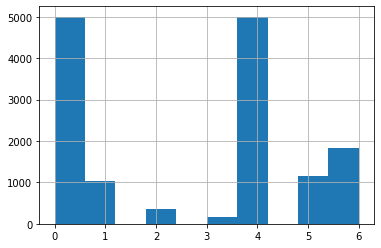

In [ ]:
df_new.Emotion.hist()
plt.show()

In [ ]:
df_new = df_new.sample(frac=1).reset_index(drop=True)

In [ ]:
df_new.head()

,Emotion,Text
0,5,"Oh , no . It seems that I've lost my train tic..."
1,6,"Oh , I see him now . Wait ! That's ..."
2,6,"Wait ! Look at that board , what's on it ?"
3,0,"I believe it . Hoo , this car corners like it..."
4,0,That ’ s fine . Thanks for coming to see us ....


In [ ]:
data = df_new.iloc[:13500,:]

In [ ]:
data.shape

(13500, 2)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
test = df_new.iloc[13500:,:]

In [ ]:
test.shape

(1022, 2)

In [ ]:
type(test)

pandas.core.frame.DataFrame

# Data Preprocessing

In [ ]:
data.head()

,Emotion,Text
0,5,"Oh , no . It seems that I've lost my train tic..."
1,6,"Oh , I see him now . Wait ! That's ..."
2,6,"Wait ! Look at that board , what's on it ?"
3,0,"I believe it . Hoo , this car corners like it..."
4,0,That ’ s fine . Thanks for coming to see us ....


In [ ]:
data.shape

(13500, 2)

In [ ]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"must've": "must have",
"should've": "should have"
}

In [ ]:
def clean_text(words):
    words = re.sub(r'http\S+', '', str(words))
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed if word not in set(stop_words)]
    reformed = [word for word in reformed if len(word) > 2]
    reformed = ' '.join(reformed)
    return reformed

data['CleanText'] = data['Text'].apply(clean_text)

C:\Users\Ananay Srivastava\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
data.head()

,Emotion,Text,CleanText
0,5,"Oh , no . It seems that I've lost my train tic...",seems lost train ticket
1,6,"Oh , I see him now . Wait ! That's ...",see wait
2,6,"Wait ! Look at that board , what's on it ?",wait look board
3,0,"I believe it . Hoo , this car corners like it...",believe hoo car corner like rail
4,0,That ’ s fine . Thanks for coming to see us ....,fine thanks coming see hope able let know job ...


In [ ]:
test.head()

,Emotion,Text
13500,6,I didn't do anything .
13501,6,You're kidding !
13502,1,He does everything so mindlessly that he is g...
13503,0,We've managed to reduce our energy consumption...
13504,0,Did you hear ? The state is thinking of legali...


In [ ]:
def clean_text(words):
    words = re.sub(r'http\S+', '', str(words))
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed if word not in set(stop_words)]
    reformed = [word for word in reformed if len(word) > 2]
    reformed = ' '.join(reformed)
    return reformed

test['CleanText'] = test['Text'].apply(clean_text)

C:\Users\Ananay Srivastava\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
test.head()

,Emotion,Text,CleanText
13500,4,I don't think so . Let's walk by the stream ....,think let walk stream sure find waterfall map
13501,6,"150 ? No , I'm not really interested in this ...",really interested place big enough near enough...
13502,5,I doubt if I can pass it .,doubt pas
13503,5,I am sorry . It's a one-price shop .,sorry shop
13504,6,Hey ! The movie hasn't even started and they'...,hey movie even started almost gone


In [ ]:
X_train = data[['CleanText']]
X_test = test[['CleanText']]
Y_train = data[['Emotion']]
Y_test = test[['Emotion']]

# Feature Extraction and Model training
## Model 1: Bag Of Words

In [ ]:
def clean_text(words):
    words = re.sub(r'http\S+', '', str(words))
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed if word not in set(stop_words)]
    reformed = [word for word in reformed if len(word) > 2]
    #reformed = ' '.join(reformed)
    return reformed

df_new['CleanText'] = df_new['Text'].apply(clean_text)

In [ ]:
df_new.head()

,Emotion,Text,CleanText
0,4,You're welcome .,[welcome]
1,4,"The lyrics of the new song are beautiful , to...","[lyric, new, song, beautiful, sing]"
2,0,That ’ s right . Another thing to remember wh...,"[right, another, thing, remember, surfing, add..."
3,4,You're welcome .,[welcome]
4,5,Any rain right now would be pointless .,"[rain, right, would, pointless]"


In [ ]:
all_words = []

for sentence in df_new['CleanText']:
    for word in sentence:
        all_words.append(word)

In [ ]:
len(all_words)

68354

In [ ]:
all_words = nltk.FreqDist(all_words)

In [ ]:
word_features = list(all_words.keys())[:3000]

In [ ]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features    

In [ ]:
#featuresets = [find_features(sentence) for sentence in X]
featuresets = []
for i in range(0,14522):
    featuresets.append(find_features(df_new['CleanText'][i]))

In [ ]:
fvectorbow = pd.DataFrame.from_dict(featuresets)

In [ ]:
fvectorbow.shape

(14522, 3000)

In [ ]:
fvectorbow.head()

,welcome,lyric,new,song,beautiful,sing,right,another,thing,remember,...,luxury,heatstroke,chaotic,faith,lock,hill,filed,divorce,trust,dependable
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
fvectorbow = fvectorbow.astype(int)

In [ ]:
fvectorbow.head()

,welcome,lyric,new,song,beautiful,sing,right,another,thing,remember,...,luxury,heatstroke,chaotic,faith,lock,hill,filed,divorce,trust,dependable
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#fvector-bow.to_csv(r"fvector-bow.csv")

## Model 2: TFIDF

In [ ]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1)

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(data['CleanText']) + list(test['CleanText']))
X_train_tfv =  tfv.transform(data['CleanText']) 
X_test_tfv = tfv.transform(test['CleanText'])

In [ ]:
X_train_tfv.shape, X_test_tfv.shape

((13500, 5465), (1022, 5465))

In [ ]:
print(type(X_train_tfv))
print(type(Y_train))
#Y_train.values[:200]

<class 'scipy.sparse.csr.csr_matrix'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
#X_temp = pd.DataFrame(X_train_tfv.toarray())

In [ ]:
#X_temp.head()

In [ ]:
#X_temp.shape

In [ ]:
#X_temp.to_csv(r"fvector_tfidf.csv")

In [ ]:
#X_temp.tail()

## SVM model on TFIDF feature vector

In [ ]:
# hyperparameter tuning parameters
params_grid = [{'kernel':['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1e-1, 1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1e-1, 1, 10, 100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid,
                       n_jobs = -1,
                       verbose = 10, refit=True,cv=5)
svm_model.fit(X_train_tfv, Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 22.0min finished
C:\Users\Ananay Srivastava\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
             verbose=10)

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_tfv)

Best score for training data: 0.6056296296296296 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [ ]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], 
#colnames=['Predicted Activity']))
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train_tfv , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_tfv, Y_test))

svm_model.score

[[242   2   1   1  75  13  10]
 [ 33  23   0   1   8   3   5]
 [ 10   7   5   0   1   0   0]
 [  6   0   0   5   1   1   1]
 [ 92   2   0   0 246   1   8]
 [ 27   4   0   1   5  46   5]
 [ 33   6   0   0  15   1  76]]


              precision    recall  f1-score   support

           0       0.55      0.70      0.61       344
           1       0.52      0.32      0.39        73
           2       0.83      0.22      0.34        23
           3       0.62      0.36      0.45        14
           4       0.70      0.70      0.70       349
           5       0.71      0.52      0.60        88
           6       0.72      0.58      0.64       131

    accuracy                           0.63      1022
   macro avg       0.67      0.49      0.54      1022
weighted avg       0.64      0.63      0.62      1022

Training set score for SVM: 0.792667
Testing  set score for SVM: 0.629159


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
             verbose=10)>

# Feature Selection
## Truncated Singular Value Decomposition (SVD) method

In [ ]:
# Apply SVD, I chose 120 components. 120-200 components are good enough for SVM model.
svd = decomposition.TruncatedSVD(n_components=120)
svd.fit(X_train_tfv)
X_train_svd = svd.transform(X_train_tfv)
X_test_svd = svd.transform(X_test_tfv)

# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
scl = preprocessing.StandardScaler()
scl.fit(X_train_svd)
X_train_svd_scl = scl.transform(X_train_svd)
X_test_svd_scl = scl.transform(X_test_svd)

In [ ]:
X_train_svd_scl.shape, X_test_svd_scl.shape

((13500, 120), (1022, 120))

In [ ]:
type(X_train_svd_scl)

numpy.ndarray

In [ ]:
#X_fs = pd.DataFrame(X_train_svd_scl)

In [ ]:
#X_fs.head()

In [ ]:
#X_fs.to_csv(r"fvector-svd.csv")

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

# initialize Our first RandomForestRegressor model...
svm = SVC(C=1)
regr2 = CalibratedClassifierCV(svm)
# declare parameters for hyperparameter tuning
regr2.fit(X_train_svd_scl, Y_train)

C:\Users\Ananay Srivastava\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


CalibratedClassifierCV(base_estimator=SVC(C=1))

In [ ]:
predictions = regr2.predict(X_train_svd_scl)

In [ ]:
print("Train accuracy:")
print(classification_report(Y_train, predictions))

Train accuracy:
              precision    recall  f1-score   support

           0       0.54      0.86      0.66      4656
           1       0.93      0.06      0.11       949
           2       0.59      0.07      0.12       330
           3       0.00      0.00      0.00       160
           4       0.78      0.70      0.74      4651
           5       0.76      0.48      0.59      1062
           6       0.72      0.49      0.58      1692

    accuracy                           0.64     13500
   macro avg       0.62      0.38      0.40     13500
weighted avg       0.68      0.64      0.61     13500



C:\Users\Ananay Srivastava\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predictions = regr2.predict(X_test_svd_scl)

In [ ]:
print("Test accuracy:")
print(classification_report(Y_test, predictions))

Test accuracy:
              precision    recall  f1-score   support

           0       0.46      0.77      0.58       344
           1       0.00      0.00      0.00        73
           2       1.00      0.04      0.08        23
           3       0.00      0.00      0.00        14
           4       0.67      0.58      0.63       349
           5       0.77      0.52      0.62        88
           6       0.74      0.50      0.59       131

    accuracy                           0.57      1022
   macro avg       0.52      0.34      0.36      1022
weighted avg       0.57      0.57      0.54      1022



C:\Users\Ananay Srivastava\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 3: Word Vectors

In [ ]:
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['CleanText']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 13500/13500 [00:00<00:00, 21842.62it/s]

13500
300


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['CleanText']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 1022/1022 [00:00<00:00, 20051.45it/s]

1022
300


In [ ]:
xtrain_glove = np.array(avg_w2v_vectors_train)
xtest_glove = np.array(avg_w2v_vectors_test)

In [ ]:
xtrain_glove.shape

(13500, 300)

In [ ]:
type(xtrain_glove)

numpy.ndarray

In [ ]:
#X_word2vec = pd.DataFrame(xtrain_glove)

In [ ]:
#X_word2vec.head()

In [ ]:
#X_word2vec.to_csv(r"fvector-word2vec.csv")

## XgBoost on Word2Vec feature vector

In [ ]:
import xgboost as xgb

# Fitting a simple xgboost on glove features
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1, silent=False)
clf.fit(xtrain_glove, Y_train)
predictions = clf.predict(xtest_glove)


print ("Test loss:")
print(classification_report(Y_test, predictions))

C:\Users\Ananay Srivastava\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:49:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test loss:
              precision    recall  f1-score   support

           0       0.53      0.74      0.62       344
           1       0.50      0.23      0.32        73
           2       1.00      0.17      0.30        23
           3       0.83      0.36      0.50        14
           4       0.71      0.72      0.71       349
           5       0.76      0.50      0.60        88
           6       0.84      0.49      0.62       131

    accuracy                           0.63      1022
   macro avg       0.74      0.46      0.52      1022
weighted avg       0.66      0.63      0.62      1022



## Model 4: MultiLayer Perceptron (MLP)

In [ ]:
# scale the data before any neural net:
scl = preprocessing.StandardScaler()
xtrain_glove_scl = scl.fit_transform(xtrain_glove)
xtest_glove_scl = scl.transform(xtest_glove)

In [ ]:
y_train_nn = np_utils.to_categorical(Y_train)
y_test_nn = np_utils.to_categorical(Y_test)

In [ ]:
model = Sequential()

model.add(Dense(128, input_dim=300, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(7))
model.add(Activation('softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               38528     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [ ]:
history = model.fit(xtrain_glove_scl, y=y_train_nn, batch_size=64, 
          epochs=10, verbose=1, 
          validation_data=(xtest_glove_scl, y_test_nn))

Train on 13500 samples, validate on 1022 samples
Epoch 1/10
13500/13500 [==============================] - 6s 430us/step - loss: 1.6998 - accuracy: 0.4128 - val_loss: 1.2727 - val_accuracy: 0.5352
Epoch 2/10
13500/13500 [==============================] - 3s 236us/step - loss: 1.2914 - accuracy: 0.5370 - val_loss: 1.1790 - val_accuracy: 0.5509
Epoch 3/10
13500/13500 [==============================] - 3s 224us/step - loss: 1.1993 - accuracy: 0.5601 - val_loss: 1.1297 - val_accuracy: 0.5665
Epoch 4/10
13500/13500 [==============================] - 3s 217us/step - loss: 1.1501 - accuracy: 0.5819 - val_loss: 1.1042 - val_accuracy: 0.5822
Epoch 5/10
13500/13500 [==============================] - 3s 219us/step - loss: 1.1196 - accuracy: 0.5887 - val_loss: 1.0910 - val_accuracy: 0.5871
Epoch 6/10
13500/13500 [==============================] - 3s 243us/step - loss: 1.0931 - accuracy: 0.6003 - val_loss: 1.0737 - val_accuracy: 0.5930
Epoch 7/10
13500/13500 [==============================] - 3s 21

## Model 5: LSTM

In [ ]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 70
a =list(X_train['CleanText']) + list(X_test['CleanText'])
token.fit_on_texts(a)
xtrain_seq = token.texts_to_sequences(X_train['CleanText'])
xtest_seq = token.texts_to_sequences(X_test['CleanText'])

# zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len)

word_index = token.word_index

In [ ]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "Desktop/studies/Kaggle competitions codes/datasets/Friends 2 dataset/glove.6B.300d.txt"
)

embeddings_index = {}
with open(path_to_glove_file, encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|███████████████████████████████████████████████████████████████████████████| 6722/6722 [00:00<00:00, 79132.26it/s]


In [ ]:
# A simple LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

history=model.fit(xtrain_pad, y=y_train_nn, batch_size=512, epochs=200, verbose=1, 
                  validation_data=(xtest_pad, y_test_nn), callbacks=[earlystop])

Train on 13500 samples, validate on 1022 samples
Epoch 1/200
13500/13500 [==============================] - 190s 14ms/step - loss: 1.5538 - accuracy: 0.3827 - val_loss: 1.3866 - val_accuracy: 0.4501
Epoch 2/200
13500/13500 [==============================] - 197s 15ms/step - loss: 1.3758 - accuracy: 0.4764 - val_loss: 1.3191 - val_accuracy: 0.5215
Epoch 3/200
13500/13500 [==============================] - 201s 15ms/step - loss: 1.3210 - accuracy: 0.5026 - val_loss: 1.2247 - val_accuracy: 0.5352
Epoch 4/200
13500/13500 [==============================] - 198s 15ms/step - loss: 1.2829 - accuracy: 0.5203 - val_loss: 1.1927 - val_accuracy: 0.5665
Epoch 5/200
13500/13500 [==============================] - 194s 14ms/step - loss: 1.2494 - accuracy: 0.5367 - val_loss: 1.1678 - val_accuracy: 0.5753
Epoch 6/200
13500/13500 [==============================] - 183s 14ms/step - loss: 1.2298 - accuracy: 0.5490 - val_loss: 1.1313 - val_accuracy: 0.5812
Epoch 7/200
13500/13500 [==========================

## Model 6: Bi-LSTM

In [ ]:
# A simple bidirectional LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(300, dropout=0.3, recurrent_dropout=0.3)))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

history=model.fit(xtrain_pad, y=y_train_nn, batch_size=512, epochs=200, verbose=1, 
                  validation_data=(xtest_pad, y_test_nn), callbacks=[earlystop])

Train on 13500 samples, validate on 1022 samples
Epoch 1/200
13500/13500 [==============================] - 345s 26ms/step - loss: 1.5679 - accuracy: 0.3824 - val_loss: 1.3806 - val_accuracy: 0.4648
Epoch 2/200
13500/13500 [==============================] - 342s 25ms/step - loss: 1.3787 - accuracy: 0.4759 - val_loss: 1.2907 - val_accuracy: 0.4961
Epoch 3/200
13500/13500 [==============================] - 344s 26ms/step - loss: 1.3268 - accuracy: 0.4971 - val_loss: 1.2399 - val_accuracy: 0.5352
Epoch 4/200
13500/13500 [==============================] - 349s 26ms/step - loss: 1.2764 - accuracy: 0.5281 - val_loss: 1.1918 - val_accuracy: 0.5470
Epoch 5/200
13500/13500 [==============================] - 409s 30ms/step - loss: 1.2479 - accuracy: 0.5413 - val_loss: 1.1627 - val_accuracy: 0.5744
Epoch 6/200
13500/13500 [==============================] - 397s 29ms/step - loss: 1.2217 - accuracy: 0.5497 - val_loss: 1.1468 - val_accuracy: 0.5900
Epoch 7/200
13500/13500 [==========================

## Model 7: CNN Model

In [ ]:
model = Sequential()
#model.add(Embedding(2737, 128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(Conv1D(256, 3, border_mode='same'))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Conv1D(128, 3, border_mode='same'))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Conv1D(64, 3, border_mode='same'))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Conv1D(32, 3, border_mode='same'))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu')) 
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])


# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

history=model.fit(xtrain_pad, y=y_train_nn, batch_size=512, epochs=200, verbose=1, 
                  validation_data=(xtest_pad, y_test_nn), callbacks=[earlystop])